In [19]:
import numpy as np
from mnist import MNIST # require `pip install python-mnist`
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import matplotlib
import scipy.misc

In [6]:
def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)


    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A         the basis, with patches as column vectors

    # In case the midpoint is not set at 0, we shift it dynamically

    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))

    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)

    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]

    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)

    image = (image + 1) / 2

    #PIL.Image.fromarray(np.uint8(image * 255), 'RGB').save(filename)

    return image

In [34]:
mndata = MNIST('../MNIST/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
print(len(X))

# 10 clusters
K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

1000


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(784, 10)


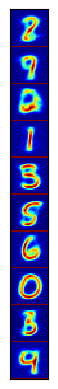

In [53]:
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')



In [78]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    # get points that has label = k
    Xk = X0[pred_label == k, :]
    # get the center
    center_k = [kmeans.cluster_centers_[k]]
    # initialize the nearest neighbors
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    print(k)
    print(nearest_id)

    # 20 images that are closest to the center
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    # 20 random images from the cluster
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

0
[[ 71  56  59  29  74  17  23 107  36  31  22  63  68  91  58 111  69  73
  105  54]]
1
[[ 96  47 154 144 193 147 164 187  93 134  53  87  27 165  54 114 177  11
  163  49]]
2
[[59 14 26 19 43 68 30 62 70 66 60  4  9 50  7 20 57 46 28 63]]
3
[[152 104 120  67 126 133  60  68  29 117 101 137  59  66  58 149  86  28
  110  71]]
4
[[76 54 14 11 66 84 17 28  2 30 41 69 75 36 26 29 50 49  8 59]]
5
[[ 7 26  6 39  1 11  2 18 46 30 25 33 55 31 32 23 10 13 45  8]]
6
[[41  1 26  3 60  0 34  8  7 48 59 35 62 51 24 40 53 61 38 10]]
7
[[ 1 33 29 51 40 63  7 56 39 34  6 43 54  2 32 13 37 41 10 44]]
8
[[59 79 84 64 44  7 85 91 14 45  9  4  6  3 25 70 50 36 57 20]]
9
[[13 15 46 76  2 85 38 34 25 62 33  5 41  0 10  4 86 49 51 75]]


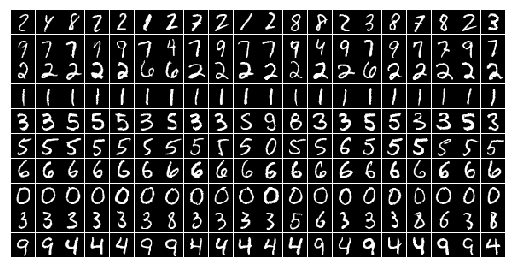

In [64]:
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

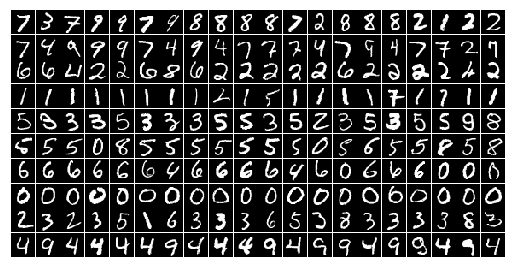

In [69]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()